In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Scale 불량 분석

## 데이터 정제

### 데이터 가져오기

In [179]:
data = pd.read_csv("./SCALE불량.csv", engine='python',encoding="euc-kr").drop('ROLLING_DATE',axis=1).drop("PLATE_NO",axis=1)
data.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


### 결측치 확인

In [180]:
data.isnull().sum(axis = 0)

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [181]:
data.shape

(720, 19)

##### 결측치 없음

In [182]:
data.SCALE = data.SCALE.map(lambda x: 1 if x=='불량' else 0)
data.HSB = data.HSB.map(lambda x: 1 if x=='적용' else 0)

In [183]:
data.SPEC.value_counts()

JS-SM490YB     84
LR-A           54
NV-A           48
PILAC-BT33     40
BV-EH36-TM     35
NV-A32         33
LR-AH32        33
JS-SM490A      31
BV-B           28
COMMON         28
KR-A           27
SA283-C        21
JS-SS400       19
AB/EH36-TM     17
GL-E36-TM      16
BV-AH32        14
LR-B           13
NK-KA32        12
GL-A36-TM      11
GL-A32          8
GL-D36-TM       8
KS-SM490B       7
AB/A            7
A283-C          6
AB/B            6
GL-E32-TM       6
JS-SM400B       5
JS-SM490YA      5
KS-SS400        5
KS-SM490A       5
               ..
GL-A32-TM       4
V42JBN3         4
KS-SM400A       4
NV-B            3
KR-AH32         3
NV-A32-TM       3
BV-AH32-TM      3
BV-AH36-TL      3
GL-A            3
NK-KD36-TM      2
AB/EH32-TM      2
NV-A36-TM       2
JS-SM400A       2
API-2W-50T      2
A516-60         2
NV-E32-TM       2
KS-HSB500       2
LR-EH36-TM      2
BV-AH36-TM      1
BV-EH32-TM      1
BV-A            1
LR-EH32-TM      1
LR-AH36-TM      1
A709-36         1
NK-KA32-TM

In [184]:
a = data.SPEC.map(lambda x: [i for i in re.split(r'/',x) if i])

In [185]:
a

0      [AB, EH32-TM]
1      [AB, EH32-TM]
2        [NV-E36-TM]
3        [NV-E36-TM]
4       [BV-EH36-TM]
5       [BV-EH36-TM]
6       [BV-EH36-TM]
7       [BV-EH36-TM]
8       [BV-EH36-TM]
9           [COMMON]
10          [COMMON]
11          [COMMON]
12          [COMMON]
13          [COMMON]
14       [GL-E32-TM]
15       [GL-E32-TM]
16       [GL-E32-TM]
17       [GL-E32-TM]
18       [GL-E32-TM]
19       [GL-E32-TM]
20      [BV-EH36-TM]
21       [GL-E36-TM]
22       [GL-E36-TM]
23       [GL-E36-TM]
24       [GL-E36-TM]
25       [GL-E36-TM]
26          [COMMON]
27          [COMMON]
28          [COMMON]
29          [COMMON]
           ...      
690        [NK-KA32]
691           [LR-A]
692         [NV-A32]
693        [NK-KA32]
694        [NK-KA32]
695        [NK-KA32]
696         [GL-A32]
697        [LR-AH32]
698         [NV-A32]
699        [LR-AH32]
700        [LR-AH32]
701         [GL-A32]
702        [LR-AH32]
703        [LR-AH32]
704        [LR-AH32]
705        [LR-AH32]
706         [

In [186]:
a_set = []
for i in a.values:
    for j in i:
        a_set.append(j)
from collections import Counter
Counter(a_set)
# KR,ABS,LR,DNV,NK,GL,BV,CR,RINA,CSS,RS

Counter({'AB': 37,
         'EH32-TM': 2,
         'NV-E36-TM': 5,
         'BV-EH36-TM': 35,
         'COMMON': 28,
         'GL-E32-TM': 6,
         'GL-E36-TM': 16,
         'EH36-TM': 17,
         'KS-HSB600': 1,
         'LR-EH36-TM': 2,
         'BV-B': 28,
         'LR-B': 13,
         'JS-SM490YB': 84,
         'KR-B': 1,
         'LR-A': 54,
         'JS-SM490A': 31,
         'KS-SM400B': 4,
         'JS-SM400B': 5,
         'B': 6,
         'KS-SS400': 5,
         'KR-A': 27,
         'NV-A': 48,
         'JS-SS400': 19,
         'KS-SM400A': 4,
         'KS-SM490B': 7,
         'V42JBN3': 4,
         'BV-AH32': 14,
         'JS-SM490YA': 5,
         'AH32': 5,
         'LR-AH32': 33,
         'NV-B': 3,
         'NV-A32': 33,
         'KS-SM490A': 5,
         'NK-KA32': 12,
         'GL-A32': 8,
         'A': 7,
         'LR-AH36': 1,
         'A709-36': 1,
         'KR-AH32': 3,
         'A516-60': 2,
         'GL-A': 3,
         'NK-KA': 5,
         'NV-D36-TM': 5,
       

In [30]:
data.head(1)

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,1,8,2조


In [31]:
# data_bin = data[['SCALE','HSB']]
data_numeric = data.drop(['SCALE','HSB'],axis=1).select_dtypes(["int64","float64"])
data_numeric = pd.DataFrame(scale(data_numeric),columns=data_numeric.columns)
data_cate = data.drop(data_numeric.columns,axis=1)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
data_numeric.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,-0.19693
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,-0.19693
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,-0.19693
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,-0.19693
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,-0.19693


In [33]:
data_cate.head()

,SCALE,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,0,AB/EH32-TM,T1,1호기,1,2조
1,0,AB/EH32-TM,T1,1호기,1,2조
2,0,NV-E36-TM,T8,2호기,1,3조
3,0,NV-E36-TM,T8,2호기,1,3조
4,0,BV-EH36-TM,T8,3호기,1,1조


In [34]:
data = pd.concat([data_cate,data_numeric],axis=1,sort=False)
data.head()

,SCALE,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,AB/EH32-TM,T1,1호기,1,2조,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,-0.19693
1,0,AB/EH32-TM,T1,1호기,1,2조,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,-0.19693
2,0,NV-E36-TM,T8,2호기,1,3조,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,-0.19693
3,0,NV-E36-TM,T8,2호기,1,3조,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,-0.19693
4,0,BV-EH36-TM,T8,3호기,1,1조,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,-0.19693


### 이상치 확인

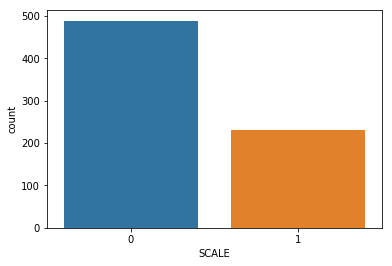

In [11]:
sns.countplot(data.SCALE,label="Count")

(9360, 3)


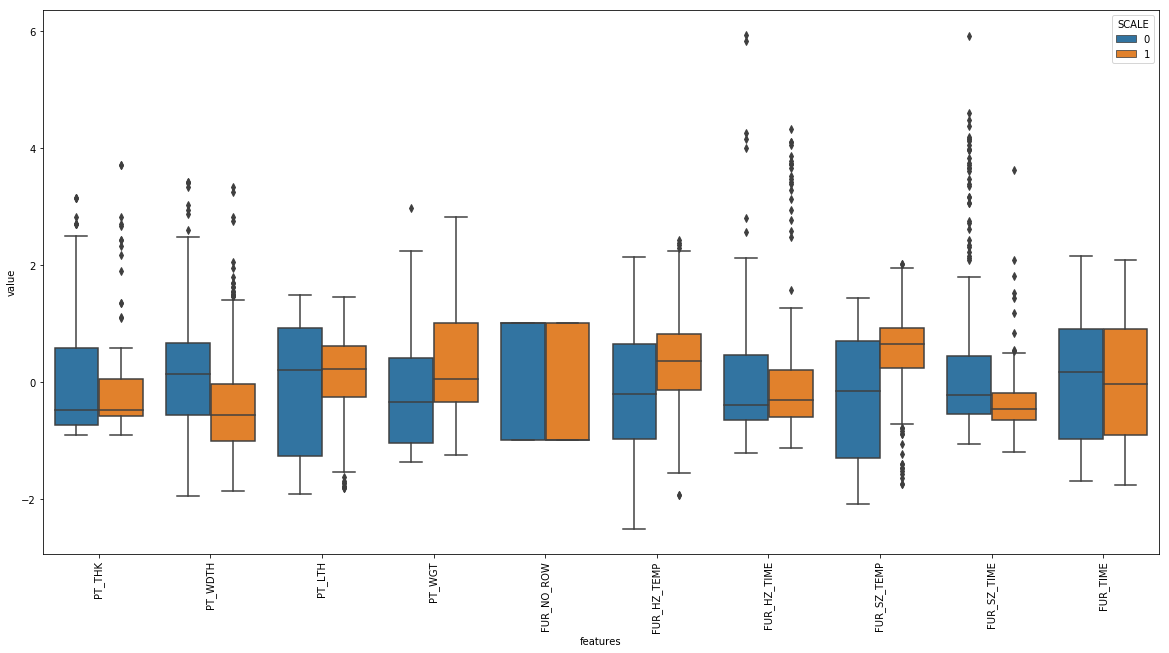

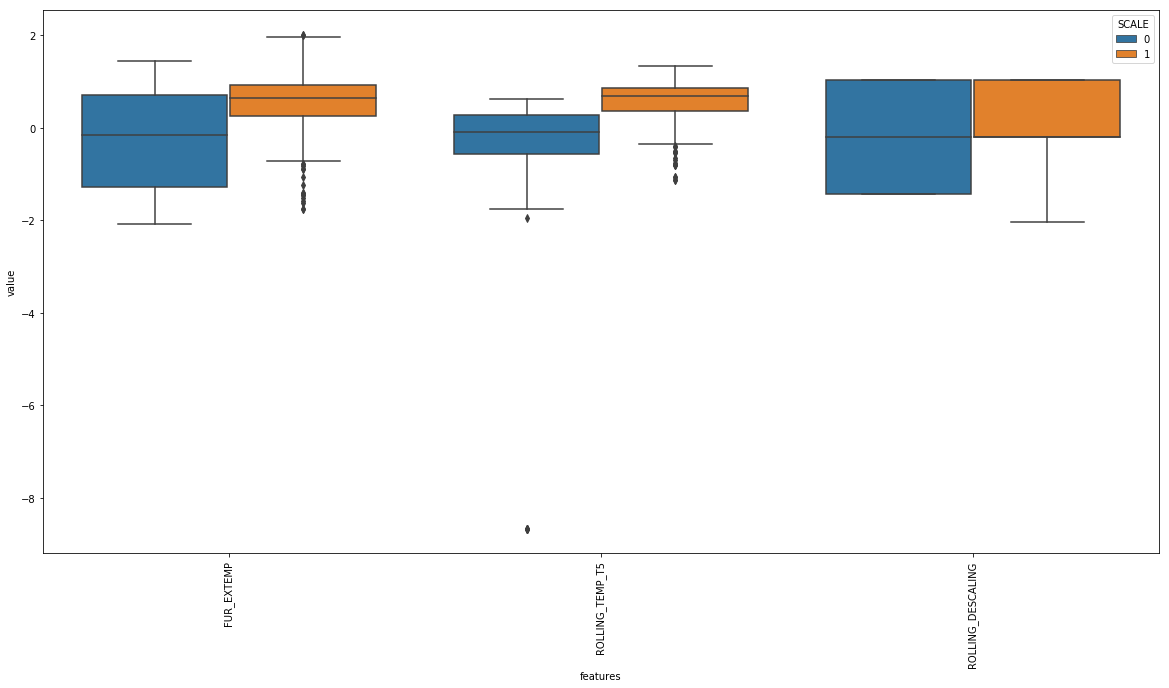

In [35]:
scaled_data = pd.concat([data['SCALE'],data_numeric],axis=1)
data_plot = pd.melt(scaled_data, id_vars="SCALE", var_name="features", value_name='value')
print(data_plot.shape)
for n in range(data.shape[1]//10+1):
    plt.figure(figsize=(20,10))
    sns.boxplot(x="features", y="value", hue="SCALE", data=data_plot.iloc[(n*10)*data.shape[0]:((n+1)*10)*data.shape[0],:])
    plt.xticks(rotation=90)

In [36]:
# 이상치를 제거한 DF 를 반환하는 함수
def remove_outlier(data):
    Q1 = data.quantile (0.25) 
    Q3 = data.quantile (0.75) 
    IQR = Q3-Q1
    
    return(data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)])

In [39]:
scaled_data.head().shape

(5, 14)

In [40]:
scaled_0 = remove_outlier(scaled_data.loc[scaled_data.SCALE == 0])
scaled_0.shape

(427, 14)

In [41]:
scaled_1 = remove_outlier(scaled_data.loc[data.SCALE == 1])
scaled_1.shape

(164, 14)

In [43]:
scaled_data = pd.concat([scaled_0,scaled_1],axis=0).dropna()
scaled_data.shape

(591, 14)

In [46]:
print("before:{}, after:{}".format(data.shape,scaled_data.shape))
# print(data.shape)
# print(scaled_data.shape())

before:(720, 19), after:(591, 14)


(7683, 3)


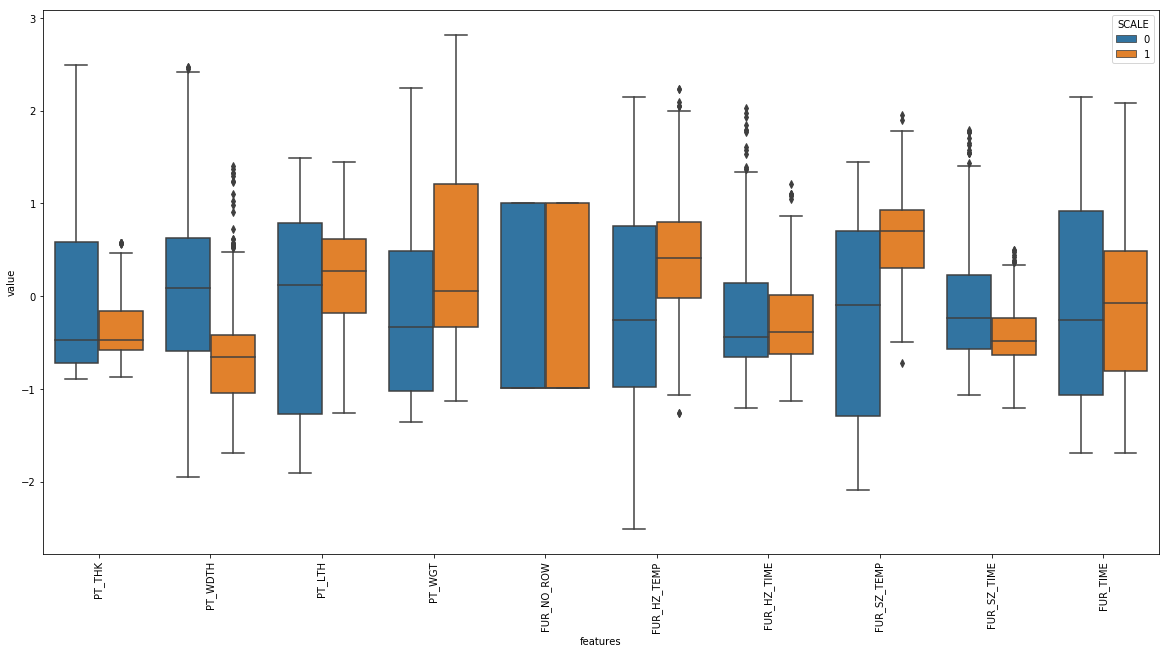

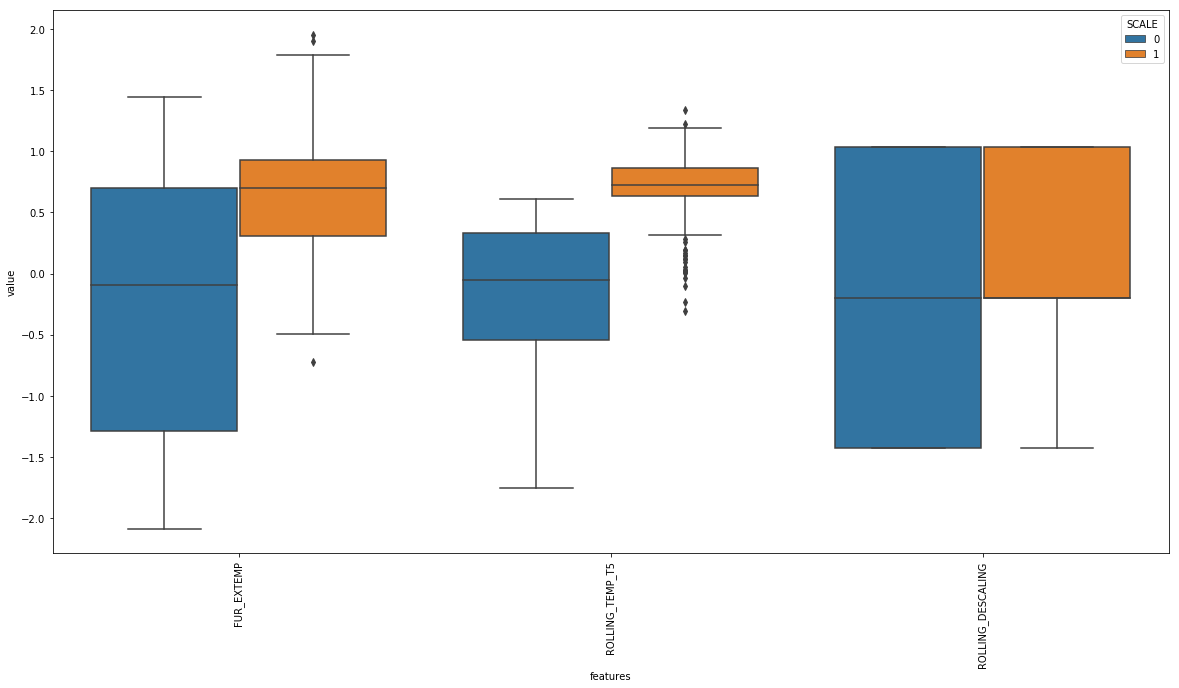

In [48]:
data_plot = pd.melt(scaled_data, id_vars="SCALE", var_name="features", value_name='value')
print(data_plot.shape)
for n in range(scaled_data.shape[1]//10+1):
    plt.figure(figsize=(20,10))
    sns.boxplot(x="features", y="value", hue="SCALE", data=data_plot.iloc[(n*10)*scaled_data.shape[0]:((n+1)*10)*scaled_data.shape[0],:])
    plt.xticks(rotation=90)

(7683, 3)


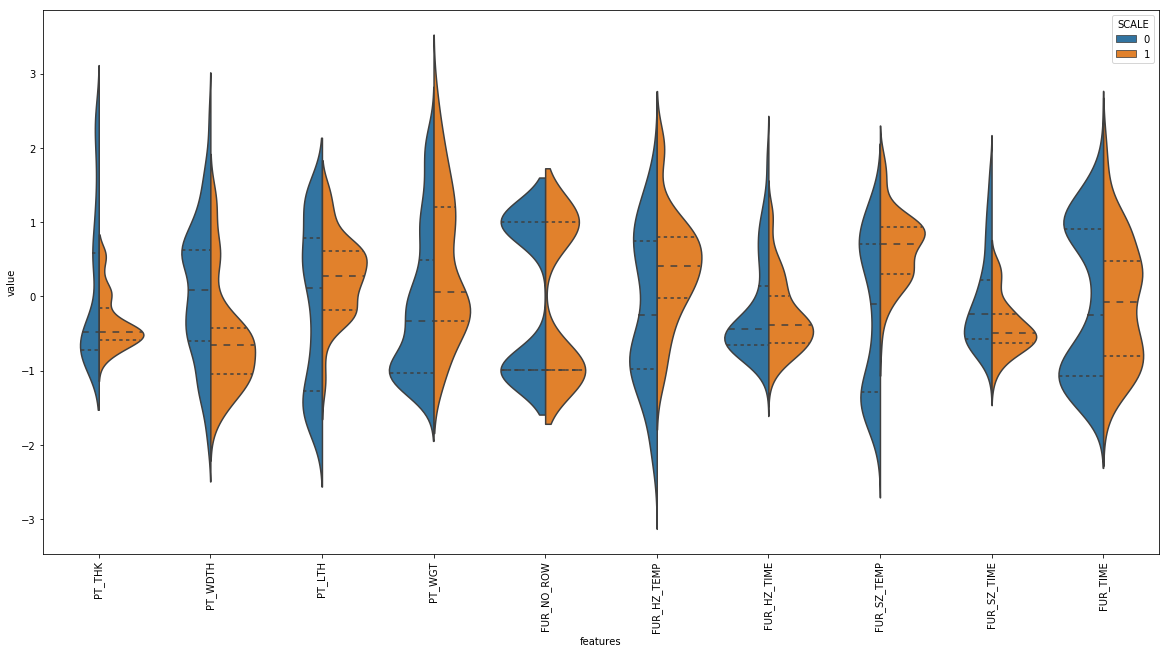

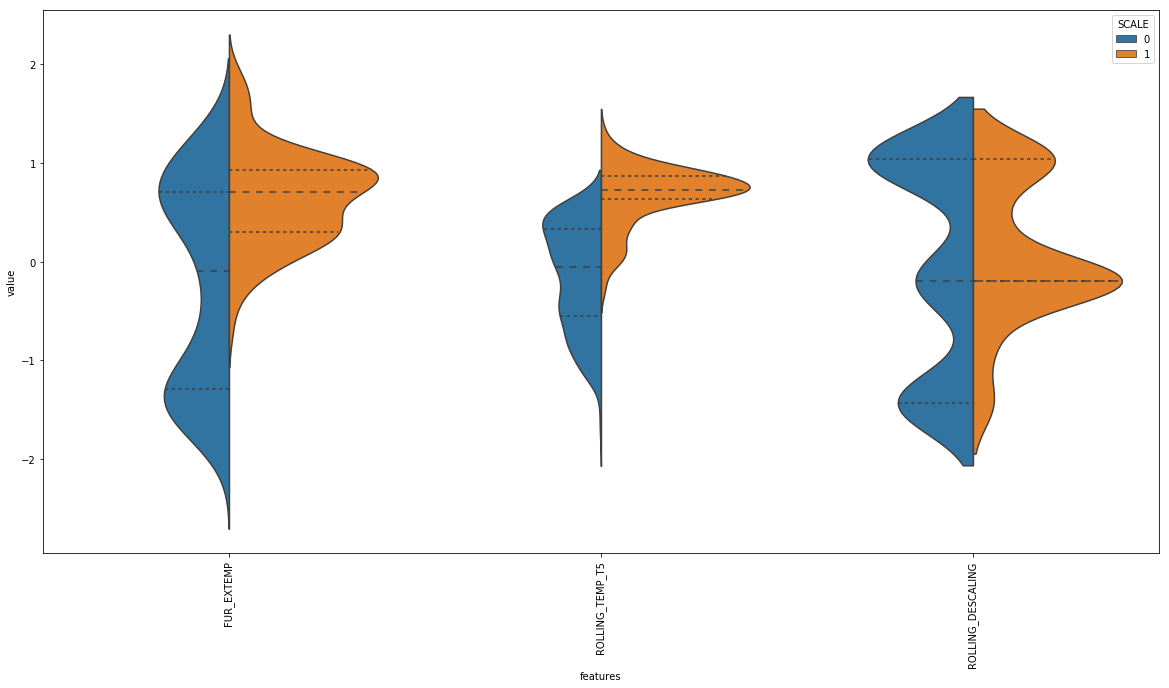

In [51]:
data_plot = pd.melt(scaled_data, id_vars="SCALE", var_name="features", value_name='value')
print(data_plot.shape)
for n in range(scaled_data.shape[1]//10+1):
    plt.figure(figsize=(20,10))
    sns.violinplot(x="features", y="value", hue="SCALE", data=data_plot.iloc[(n*10)*scaled_data.shape[0]:((n+1)*10)*scaled_data.shape[0],:],split=True,inner="quart")
    plt.xticks(rotation=90)

In [113]:
data_cate.columns

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'HSB', 'WORK_GR'], dtype='object')

In [115]:
data_cate.STEEL_KIND.value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [171]:
data_cate.groupby('STEEL_KIND')['SCALE'].value_counts()

STEEL_KIND  SCALE
C0          0        291
            1        212
C1          1          1
C3          0          6
            1          1
T0          0         14
            1          2
T1          0         16
            1          2
T3          0          2
T5          0         41
            1          2
T7          0         29
            1          6
T8          0         90
            1          5
Name: SCALE, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'get'

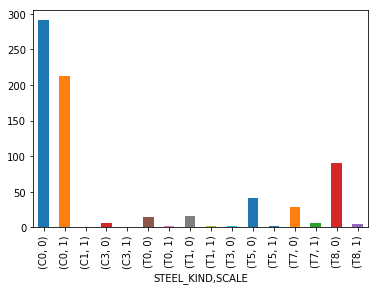

In [172]:
# sns.pairplot(data[['SCALE','STEEL_KIND']],hue="STEEL_KIND")
# data[['SCALE','STEEL_KIND']]

sns.barplot(x="SCALE", hue="STEEL_KIND", data=data_cate.groupby('STEEL_KIND')['SCALE'].value_counts().plot.bar())

In [116]:
data_cate.FUR_NO.value_counts()

3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64

In [117]:
data_cate.WORK_GR.value_counts()

4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64